In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import statistics as stats

import sys
import pickle

strPkl = '/groups/tanaka/Projects/lungfish-genome/manuscript/Revision_II/coverage/scaf02.3.coverage.pkl'
strScaffoldID = 'scaf02.3'

dat = None
with(open(strPkl, 'rb')) as hFile:
    dat = pickle.load(hFile)


In [4]:
print(f'{len(dat):,}')

1,356,672,875


In [5]:
mn = stats.mean(dat)
sd = stats.stdev(dat)
print(f'Mean: {mn}')
print(f'SD: {sd}')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/software/system/jupyter/vbc_modules/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-6184366a9bbb>", line 1, in <module>
    mn = stats.mean(dat)
  File "/software/2020/software/python/3.6.6-foss-2018b/lib/python3.6/statistics.py", line 312, in mean
    T, total, count = _sum(data)
  File "/software/2020/software/python/3.6.6-foss-2018b/lib/python3.6/statistics.py", line 148, in _sum
    for n,d in map(_exact_ratio, values):
  File "/software/2020/software/python/3.6.6-foss-2018b/lib/python3.6/statistics.py", line 201, in _exact_ratio
    def _exact_ratio(x):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/software/system/jupyter/vbc_modules/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value

KeyboardInterrupt: 

In [7]:
# Bin the data into pieces
nBinSize = 5000
bins = [0] * round(len(dat) / nBinSize)
iBin = 0
iPos = 0
while iPos < len(dat):
    bindata = dat[iPos : iPos + nBinSize]
    iPos += nBinSize
    bins[iBin] = stats.mean(bindata)
    iBin += 1
    
    if iBin % 1000 == 0:
        print(f'  Processed {iBin} bins', file=sys.stderr)
    
print(len(bins))

  Processed 1000 bins
  Processed 2000 bins
  Processed 3000 bins
  Processed 4000 bins
  Processed 5000 bins
  Processed 6000 bins
  Processed 7000 bins
  Processed 8000 bins
  Processed 9000 bins
  Processed 10000 bins
  Processed 11000 bins
  Processed 12000 bins
  Processed 13000 bins
  Processed 14000 bins
  Processed 15000 bins
  Processed 16000 bins
  Processed 17000 bins
  Processed 18000 bins
  Processed 19000 bins
  Processed 20000 bins
  Processed 21000 bins
  Processed 22000 bins
  Processed 23000 bins


23551


In [8]:
import functools

def compare(r1, r2):
    if r1['start'] < r2['start']:
        return -1
    if r1['start'] > r2['start']:
        return 1
    if r1['end'] < r2['end']:
        return -1
    if r1['end'] > r2['end']:
        return 1
    return 0

strRM = '/groups/tanaka/Projects/lungfish-genome/manuscript/Revision_II/NFOR_v3.1.repeatmasker.SCAFFOLDS.gff3'

repeats = []
with(open(strRM, 'r')) as hFile:
    for line in hFile.readlines():
        if line.startswith('#'):
            continue
        scafID, _, _, repeatStart, repeatEnd, rest = line.split('\t', 5)
        if scafID == strScaffoldID:
            repeats.append({'start': int(repeatStart), 'end': int(repeatEnd)})
print(repeats[1:3])
repeats = sorted(repeats, key=functools.cmp_to_key(compare))
print(repeats[1:3])

[{'start': 38366668, 'end': 38366830}, {'start': 38366833, 'end': 38366909}]
[{'start': 208, 'end': 281}, {'start': 282, 'end': 296}]


Total length of 29 extremely highly covered regions: 455,000bp (0.39%)
Average size: 15689.66


Text(0.5, 1.0, 'Coverage of scaf28')

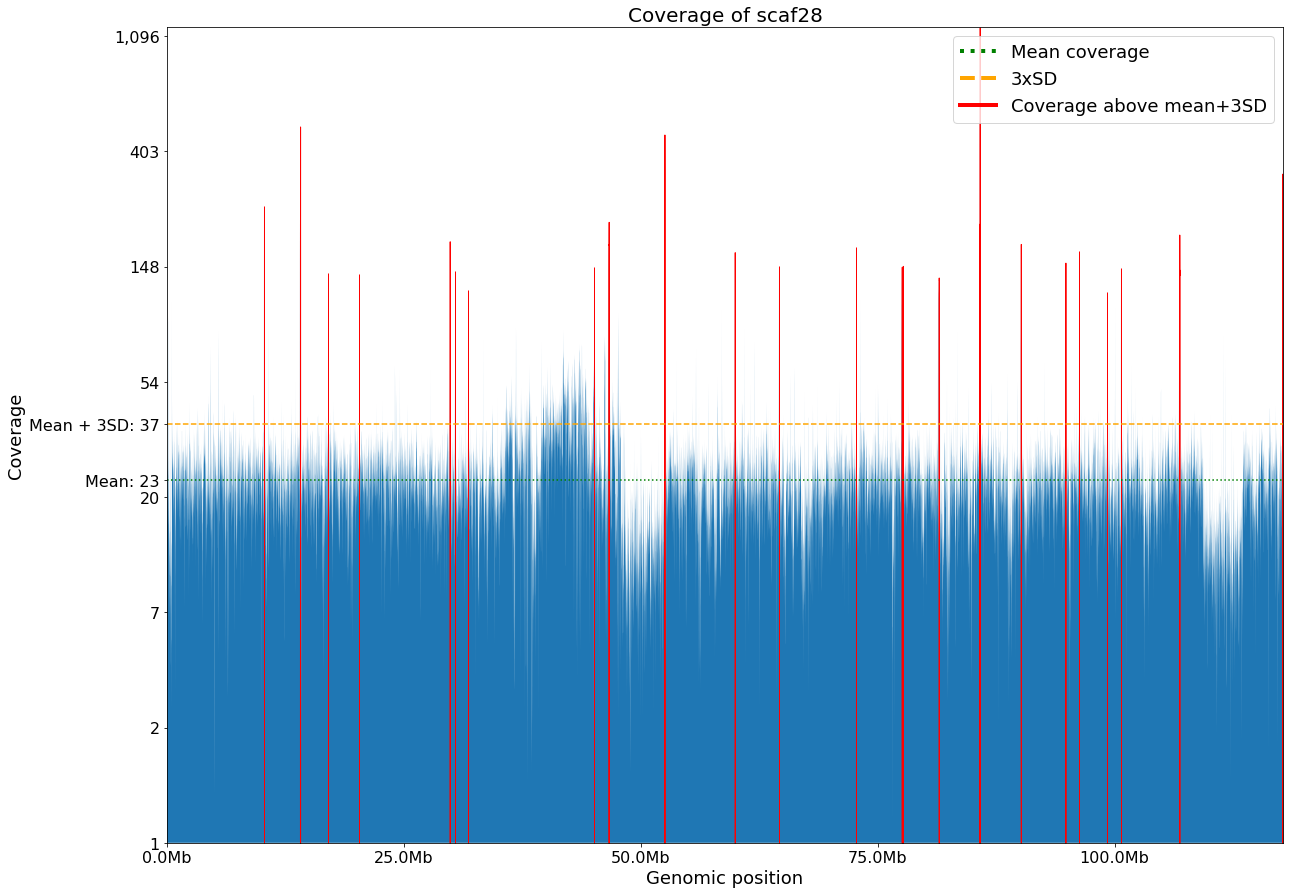

In [51]:
import math
from matplotlib.lines import Line2D
import numpy as np
from matplotlib import gridspec

bin_mean = stats.mean(bins)
bin_std = stats.stdev(bins)

fig = plt.figure(figsize=(20,15))
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica') 
plt.rc('text', usetex='false')

#gs = gridspec.GridSpec(2, 1, height_ratios=[10, 1])
#axs = [plt.subplot(gs[0]), plt.subplot(gs[1])] 
gs = gridspec.GridSpec(1, 1)
axs = [plt.subplot(gs[0])]

bins_log = [math.log(x) for x in bins]
axs[0].fill_between(range(0, len(bins)), bins_log)
axs[0].autoscale()

reg_widths = []
uhc_regs = []       # Ultra-high coverage regions
reg_start = -1
for idx, b in enumerate(bins):
    if b >= 3 * (bin_mean + bin_std):
        if reg_start == -1:
            reg_start = idx
    else:
        if reg_start > -1:
            reg_widths.append((idx - reg_start + 1) * nBinSize)
            uhc_regs.append({'start': reg_start * nBinSize, 'end': idx * nBinSize})
            axs[0].fill_between(range(reg_start, idx), bins_log[reg_start : idx], color='red')
            reg_start = -1
axs[0].axhline(math.log(bin_mean), color='green', linestyle='dotted')
axs[0].axhline(math.log(bin_mean + bin_std), color='orange', linestyle='dashed')

plt.sca(axs[0])
locs, labels = plt.yticks()
new_labels = []
for y in locs:
    new_labels.append(f'{int(math.exp(y)):,}')
locs = np.append(locs, math.log(bin_mean))
new_labels.append(f'Mean: {int(math.exp(locs[-1])):,}')
locs = np.append(locs, math.log(bin_mean + bin_std))
new_labels.append(f'Mean + 3SD: {int(math.exp(locs[-1])):,}')
plt.yticks(locs, new_labels, fontsize=16)

locs, labels = plt.xticks()
new_labels = []
for x in locs:
    new_labels.append(f'{x * nBinSize / 1_000_000:,}Mb')
new_labels[-1] = ''
plt.xticks(locs, new_labels, fontsize=16)
plt.xlim([0, len(bins)])
plt.ylim([0, max(bins_log)])

total_len = sum(reg_widths)
print(f'Total length of {len(reg_widths)} extremely highly covered regions: {total_len:,}bp ({total_len/len(dat) * 100:.2}%)')
print(f'Average size: {stats.mean(reg_widths):.2f}')

custom_lines = [Line2D([0], [0], color='green', linestyle='dotted', lw=4),
                Line2D([0], [0], color='orange', linestyle='dashed', lw=4),
                Line2D([0], [0], color='red', lw=4)]
axs[0].legend(custom_lines, ['Mean coverage', '3xSD', 'Coverage above mean+3SD'], fontsize=18)
plt.xlabel('Genomic position', fontsize=18)
plt.ylabel('Coverage', fontsize=18)
plt.title(f'Coverage of {strScaffoldID}', fontsize=20)

#plt.sca(axs[1])
#plt.xlabel('Genomic position', fontsize=18)
#plt.title(f'Repeats', fontsize=20)
#axs[1].set_frame_on(False)
#axs[1].tick_params(left=False)
#axs[1].tick_params(labelleft=False)
#plt.xticks(locs, new_labels, fontsize=16)
#plt.xlim([0, len(bins)])

In [12]:
print(repeats[1:3])
print(uhc_regs[1:3])

[{'start': 208, 'end': 281}, {'start': 282, 'end': 296}]
[{'start': 14035000, 'end': 14050000}, {'start': 17015000, 'end': 17015000}]


In [14]:
import pandas as pd
print(len(repeats))
tmp = []
for r in repeats:
    tmp.append([r['start'], r['end']])
df = pd.DataFrame(data=tmp, columns=['Start', 'End'])
print(df.head())

178597
   Start   End
0      2   207
1    208   281
2    282   296
3   1226  1388
4   1385  2793


In [66]:
# There are several possibilities
# A
# UHC region   |-------|       Repeat |------|           No overlap
#
# B
# UHC region   |---------------------|
# Repeat     |----| or  |---|  or |-----|   
#
# C
# UHC region |----| or  |---|  or |-----|
# Repeat        |---------------------|

nNonEmpty = 0
for r in uhc_regs:
    reg_len = r['end'] - r['start']
    tmp = df[df['Start'].between(r['start'], r['end'], inclusive=True) | 
             df['End'].between(r['start'], r['end'], inclusive=True) |
             (r['start'] <= df['Start']) & (r['end'] >= df['Start'])]
    rep_len = 0
    if not tmp.empty:
        for row in tmp.itertuples():
            rep_len += row.End - row.Start
    f = rep_len / reg_len * 100
    print(f"Region: {r['start']}-{r['end']} has {rep_len}bp ({f:.2f}%) repeats")

Region: 10225000-10230000 has 6656bp (133.12%) repeats
Region: 14035000-14055000 has 27724bp (138.62%) repeats
Region: 17015000-17020000 has 0bp (0.00%) repeats
Region: 20305000-20310000 has 3210bp (64.20%) repeats
Region: 29835000-29845000 has 370bp (3.70%) repeats
Region: 30415000-30420000 has 10878bp (217.56%) repeats
Region: 31815000-31820000 has 0bp (0.00%) repeats
Region: 45105000-45110000 has 1237bp (24.74%) repeats
Region: 46595000-46615000 has 15664bp (78.32%) repeats
Region: 52490000-52500000 has 1981bp (19.81%) repeats
Region: 59910000-59920000 has 10104bp (101.04%) repeats
Region: 64570000-64575000 has 0bp (0.00%) repeats
Region: 72720000-72725000 has 10330bp (206.60%) repeats
Region: 77530000-77545000 has 9369bp (62.46%) repeats
Region: 77565000-77590000 has 19041bp (76.16%) repeats
Region: 77640000-77655000 has 9308bp (62.05%) repeats
Region: 77670000-77675000 has 1898bp (37.96%) repeats
Region: 77680000-77685000 has 3724bp (74.48%) repeats
Region: 81425000-81455000 has 1